### What is Y/Cb/Cr ? 

<div dir="rtl">
نوعی روش برای نشان دادن تصویر هست  ( مانند RGB ) اما تفاوت عمده با RGB در مدل نمایشی YCbCr این است که در RGB ما در ۳ چنل (‌ منظور از چنل , ماتریس های ذخیره سازی ای است که برای شدت رنگ هر رنگ RGB است یا به قولی منظور ماتریس های هر کدام از بعد های ماتریس ۳ بعدی است )‌ شدت رنگ ذخیره میکنیم اما در YCbCr ما در ۲ چنل شدت رنگ ذخیره میکنیم و در یک چنل شدت روشنایی ذخیره میکنیم (‌مانند تصاویر سیاه سفید GrayScale) به زبان ساده تر در YCbCr ما هم زمان تصویر سیاه سفید و تصویر رنگی رو ذخیره میکنیم اما چگونه ؟‌
</div>

### How Y/Cb/Cr realy work ? 

<div dir="rtl">
همانطور که گفته شده در چنل Y همانطور به شیوه تصاویر GrayScale  دارای یک چنل و شدت های هر پیکسل بین ۰ تا ۲۵۵ است 
در چنل Cb  ما شدت رنگ آبی را دراعداد مثبت این چنل ذخیره میکنیم  که این عدد بین منفی ۱۲۸ تا مثبت ۱۲۷ است ( بر خلاف RGB, GrayScale اینجا در بازه ما اعداد منفی را هم داریم )‌ و در بازه منفی ما شدت رنگ سبز را ذخیره میکنیم 
و در چنل Cr ما شدت رنگ قرمز را در اعداد مثبت این چنل ذخیره میکنیم  که شدت رنگ های این چنل هم مثل Cb بین منفی ۱۲۸ تا مثبت ۱۲۷ است و در بازه منفی هم باز ما شدت رنگ سبز را ذخیره میکنیم 
</div>

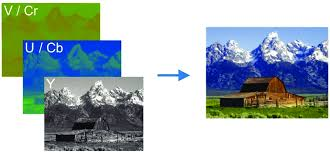

### Why we need Y/Cb/Cr ? 

<div dir="rtl">
در واقعیت این فرمت ذخیره سازی و نمایش تصویر از قدیم در زمانی که تازه از تلویزیون های رنگی اختراع شده بودند مورد استفاده قرار گرفتند . به این دلیل که آن موقع برای انتقال اطلاعات از طریق مرکز پخش (‌مانند صدا و سیما )‌به تلویزیون های خونگی اگر میخواستند مستقیم اطلاعات را به صورت RGB انتقال بدهند آن وقت کسانی که تلویزیون سیاه سفید داشتند دیگر تلویزیون هایشان بلا استفاده میشد و برای دیدن تلوزیون مجبور به خرید تلویزیون های رنگی میشدند که در آن زمان خیلی گران بودند و نمیصرفید .  برای همین نیاز به فرمتی برای ذخیره سازی تصویر نیاز داشتیم که هم بتواند اطلاعات سیاه سفید تصویر را به صورت مجزا بدهد هم بتواند اطلاعات رنگی تصاویر را به صورت مجزا بدهد آن وقت تلوزیون های سیاه سفید فقط اطلاعات چنل Y را میخواندند که همان اطلاعات سیاه سفید هست و تلویزیون های رنگی اطلاعات هر ۳ چنل را میخواندند  اما استفاده این فرمت تصویر منحصر به زمان قدیم نیست و امروزه هم استفاده میشود مانند فشرده سازی تصویر که در ادامه به ان در سر فصل دیگری میپردازیم . 
</div>

### Convert RGB to Y/Cb/Cr with using Change Basis of RGB Color Space

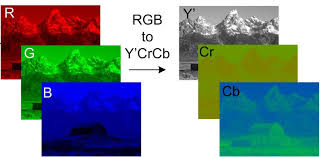

### Let's Code It

In [15]:
from PIL import Image 
image = Image.open("Images/nature.jpeg")


In [19]:
import numpy as np 
image_array = np.asarray(image)
image_shape = image_array.shape
print(image_array.shape)
#این ها فرمول های تبدیل هستند
RGB_to_YCbCr_matrix = np.array([
    [ 0.299,     0.587,     0.114   ],
    [-0.168736, -0.331264,  0.5     ],
    [ 0.5,      -0.418688, -0.081312]
], dtype=np.float32)

YCbCr_to_RGB_matrix = np.array([
    [1.0,  0.0,       1.402     ],
    [1.0, -0.344136, -0.714136 ],
    [1.0,  1.772,     0.0      ]
], dtype=np.float32)


(183, 275, 3)


In [20]:
# reshape matrix and make it ready for matrix multiplication
reshaped_array = image_array.reshape(image_shape[0]*image_shape[1] , 3)

In [25]:
offset = np.array([0, 128, 128], dtype=np.float32) # we use this offset beacuse convert Range of Cb/Cr from [-128 , 127] -> [0,255] 
ycbcr_array_2channels = reshaped_array @ RGB_to_YCbCr_matrix + offset
ycbcr_array = ycbcr_array_2channels .reshape(image_shape[0] , image_shape[1] ,3)
print("YCbCr pixel:", ycbcr_array)

YCbCr pixel: [[[129.68597    38.12879   230.18524  ]
  [129.28897    35.949104  229.76193  ]
  [130.19717    34.93151   227.8713   ]
  ...
  [123.12399    58.85327   215.02274  ]
  [144.3147     59.84661   233.83868  ]
  [148.00813    61.49643   241.49544  ]]

 [[134.46135    34.901215  234.63745  ]
  [126.838646   35.339485  226.82187  ]
  [118.085686   36.35939   218.55493  ]
  ...
  [130.11021    57.16548   223.7243   ]
  [139.68944    59.168007  233.14255  ]
  [143.2105     57.678818  235.11069  ]]

 [[120.730804   34.550835  222.71837  ]
  [113.53737    35.831833  215.6308   ]
  [104.28441    37.270424  207.44516  ]
  ...
  [142.51073    50.70385   242.78545  ]
  [143.67445    54.388794  242.93674  ]
  [139.00208    55.01799   237.97993  ]]

 ...

 [[ 18.536415  126.58301   194.88058  ]
  [ 10.153192  126.92849   185.91832  ]
  [ 25.796944  121.23285   194.97021  ]
  ...
  [ 49.228504   98.61958   213.15192  ]
  [ 53.137787   99.29286   224.56937  ]
  [ 60.70095    97.33743   230.

### Displaying Channels

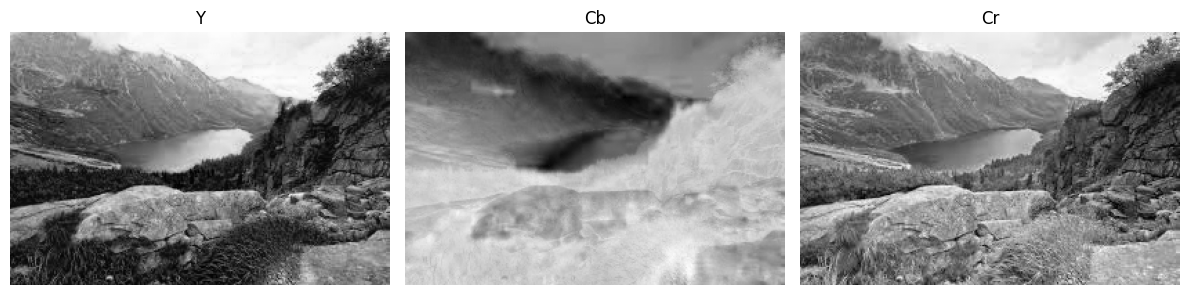

In [26]:
from matplotlib import pyplot as plt
Y_channel  = ycbcr_array[:, :, 0]
Cb_channel = ycbcr_array[:, :, 1]
Cr_channel = ycbcr_array[:, :, 2]


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Y")
plt.imshow(Y_channel, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Cb")
plt.imshow(Cb_channel, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Cr")
plt.imshow(Cr_channel, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Linear Transformation Formula


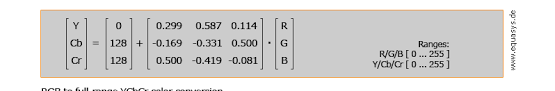